## Selection of Methods


 ##### Libraries 
 - spaCy
 
 spaCy outperforms NLTK in **word tokenization** & **Part-of-speech tagging**, and though NLTK performs faster for **Sentence tokenization** through simple attempts at splitting text into sentences, spaCy constructs a syntactic tree for each sentence which is a more robust method that yields more information about the text.

 Here we assume that the Out of bag samples are all in English, and as such spaCy can be used


 ![https://www.thedataincubator.com/wp-content/uploads/timing.png](https://www.thedataincubator.com/wp-content/uploads/timing.png)

## Methods to explore (from proposal)
- TF-IDF
- N-gram
- Word Embedding
- Bag-of-Words
- Skip-Gram


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/labeled_data.csv"
twitter_hate = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
twitter_hate.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


### Cleaning Tweets V1

https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn/notebook

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
#!python -m spacy download en_core_web_lg

In [ ]:
import string
from tqdm import tqdm
import re 

stopwords = list(STOP_WORDS) +['rt']
punctuations = list(string.punctuation)
punctuations.remove('#')
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
tqdm.pandas()
twitter_hate["tweets_cleaned_v1"] = twitter_hate["tweet"].progress_apply(spacy_tokenizer)

100%|██████████| 24783/24783 [00:12<00:00, 2050.58it/s]


1. removing @ mentions
2. URL Links
3. Numbers
4. Underscores

In [ ]:
tqdm.pandas()
twitter_hate["tweets_cleaned"] = twitter_hate["tweets_cleaned_v1"].progress_apply(lambda x: re.sub(r"(_[A-Za-z0-9-_]+)|(@[A-Za-z0-9]+)|[^\w\s]|http\S+|[0-9]", "",x))



100%|██████████| 24783/24783 [00:00<00:00, 64257.11it/s]


In [ ]:
twitter_hate.head(1000)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweets_cleaned_v1,tweets_cleaned
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,@mayasolovely woman complain cleaning house am...,woman complain cleaning house amp man trash
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,@mleew17 boy dats cold ... tyga dwn bad cuffin...,boy dats cold tyga dwn bad cuffin dat hoe st...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,@urkindofbrand dawg @80sbaby4life fuck bitch s...,dawg fuck bitch start cry confused shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,@c_g_anderson @viva_based look like tranny,look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,@shenikaroberts shit hear true faker bitch tol...,shit hear true faker bitch told ya
...,...,...,...,...,...,...,...,...,...
995,1017,3,0,3,0,1,&#128514;&#128514;&#128514;&#128514; RT @SMASH...,# 128514;&#128514;&#128514;&#128514 @smashavel...,murda sucking bitches howdhow
996,1018,3,0,3,0,1,&#128514;&#128514;&#128514;&#128514; bitch if ...,# 128514;&#128514;&#128514;&#128514 bitch hobb...,bitch hobbit need let know right
997,1019,3,0,2,1,1,&#128514;&#128514;&#128514;&#128514; these fol...,# 128514;&#128514;&#128514;&#128514 folks bad ...,folks bad talk trash
998,1020,6,0,6,0,1,&#128514;&#128514;&#128514;&#128514;&#128514; ...,# 128514;&#128514;&#128514;&#128514;&#128514 b...,brittany bitch u dog man


In [ ]:
def bucket (x):
  if x == 2:
    return 0
  else:
    return 1

In [ ]:
twitter_hate["class"] = twitter_hate['class'].progress_apply(bucket)

100%|██████████| 24783/24783 [00:00<00:00, 239182.86it/s]


In [ ]:
twitter_cleaned = twitter_hate[["tweets_cleaned","class"]]

In [ ]:
twitter_cleaned.head(10)
#twitter_cleaned.shape

(24783, 2)

# Most common words

In [ ]:
import itertools
import collections

nwl = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['class'] == 0 ]]

word_list_neutral = list(itertools.chain(*nwl))

neutral_count_word = collections.Counter(word_list_neutral)

neutral_count_word.most_common(20)

[('trash', 689),
 ('like', 304),
 ('bird', 304),
 ('charlie', 259),
 ('yankees', 223),
 ('yellow', 218),
 ('birds', 171),
 ('amp', 166),
 ('lol', 145),
 ('got', 131),
 ('colored', 117),
 ('monkey', 115),
 ('ghetto', 113),
 ('u', 111),
 ('good', 95),
 ('know', 90),
 ('new', 90),
 ('love', 87),
 ('day', 85),
 ('game', 85)]

In [ ]:
hwl = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['class'] == 1 ]]

word_list_hate = list(itertools.chain(*hwl))

hate_count_word = collections.Counter(word_list_hate)

hate_count_word.most_common(20)

[('bitch', 8299),
 ('bitches', 3109),
 ('like', 2480),
 ('hoes', 2376),
 ('pussy', 2135),
 ('hoe', 1907),
 ('ass', 1572),
 ('got', 1469),
 ('fuck', 1425),
 ('shit', 1278),
 ('nigga', 1225),
 ('u', 1185),
 ('lol', 941),
 ('niggas', 790),
 ('know', 721),
 ('amp', 681),
 ('fucking', 631),
 ('love', 629),
 ('yo', 597),
 ('bad', 535)]

In [ ]:
additional_stopwords = ["amp","u","lol","got","know","love"]
stopwords = list(STOP_WORDS) + additional_stopwords
parser = English()
def spacy_tokenizer_2(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
tqdm.pandas()
twitter_cleaned["tweets_cleaned"] = twitter_hate["tweets_cleaned"].progress_apply(spacy_tokenizer_2)

100%|██████████| 24783/24783 [00:10<00:00, 2471.31it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nwl_2 = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['class'] == 0 ]]

word_list_neutral2 = list(itertools.chain(*nwl_2))

neutral_count_word2 = collections.Counter(word_list_neutral2)

neutral_count_word2.most_common(20)

[('trash', 689),
 ('like', 304),
 ('bird', 304),
 ('charlie', 259),
 ('yankees', 223),
 ('yellow', 218),
 ('birds', 171),
 ('colored', 117),
 ('monkey', 115),
 ('ghetto', 113),
 ('good', 95),
 ('new', 90),
 ('day', 85),
 ('game', 85),
 ('man', 84),
 ('people', 83),
 ('want', 83),
 ('ho', 80),
 ('time', 79),
 ('brownies', 78)]

In [ ]:
hwl_2 = [tweet.split() for tweet in twitter_cleaned.tweets_cleaned[twitter_cleaned['class'] == 1 ]]

word_list_hate2 = list(itertools.chain(*hwl_2))

hate_count_word2 = collections.Counter(word_list_hate2)

hate_count_word2.most_common(20)

[('bitch', 8300),
 ('bitches', 3109),
 ('like', 2480),
 ('hoes', 2376),
 ('pussy', 2135),
 ('hoe', 1907),
 ('ass', 1572),
 ('fuck', 1425),
 ('shit', 1278),
 ('nigga', 1225),
 ('niggas', 790),
 ('y', 680),
 ('fucking', 631),
 ('yo', 597),
 ('bad', 535),
 ('want', 499),
 ('trash', 465),
 ('ya', 460),
 ('man', 454),
 ('good', 437)]

# N-Gram Analysis


### Unsupervised Learning for Topic Modelling 

#### Using Topic Modelling to conduct a rough EDA on the frequent words under different topics

https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn/notebook

In [ ]:
#!pip install pyldavis
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence


In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(twitter_cleaned.tweets_cleaned)

In [ ]:
NUM_TOPICS = 5

In [ ]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

NameError: ignored

In [ ]:
# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [ ]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('hoes', 1494.2808085985507), ('bitch', 1404.3770332592662), ('bitches', 792.6936535973412), ('shit', 675.6358976249079), ('want', 599.398399128069), ('like', 526.465288071133), ('niggas', 491.42031506341283), ('bird', 388.7121104259937), ('right', 382.3953193590959), ('talk', 317.7808776260843)]
Topic 1:
[('pussy', 2109.736825252769), ('bitch', 1692.5335587878162), ('like', 884.236936002416), ('hoes', 585.8629471283733), ('think', 468.13385516046793), ('good', 404.36833088050844), ('day', 348.7019468779048), ('tell', 333.12988033113936), ('little', 316.6439833158549), ('shit', 306.4182810906781)]
Topic 2:
[('trash', 1163.4578921154089), ('bitches', 455.3107877798823), ('fucking', 448.22732160809437), ('hoes', 392.77245546090575), ('wanna', 357.9037116008438), ('shit', 305.11652036781453), ('retarded', 260.62349010148677), ('niggah', 255.14291602608918), ('talking', 253.52911683775696), ('dick', 252.30322606480206)]
Topic 3:
[('hoe', 1964.3014866094124), ('look', 4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Keywords for topics clustered by Latent Semantic Indexing
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('bitch', 10.121489477513567), ('ass', 0.9816763547505031), ('fuck', 0.7695945766678304), ('nigga', 0.7349595518798843), ('shit', 0.49714398491826356), ('bad', 0.2897897479783169), ('fucking', 0.2235324317195063), ('lil', 0.2077909050301825), ('little', 0.19616398730767204), ('want', 0.1854207438815499)]
Topic 1:
[('bitches', 8.701706608361153), ('fuck', 0.8816805550804161), ('niggas', 0.8234115834933696), ('shit', 0.644306052241597), ('bad', 0.5247609956910786), ('ass', 0.47380965892221377), ('nigga', 0.41030097339364097), ('hate', 0.27646594303503746), ('want', 0.27569850670644275), ('wit', 0.2386923094317556)]
Topic 2:
[('like', 7.987080078659836), ('hoe', 1.2700812561676276), ('look', 0.7810105563477993), ('trash', 0.377468219227685), ('shit', 0.2969160352155112), ('act', 0.24239564281566298), ('feel', 0.23733675122831002), ('looks', 0.1989751357262744), ('hate', 0.19550287162766025), ('people', 0.17437869505046008)]
Topic 3:
[('hoes', 6.632152327655166), ('nig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Keywords for topics clustered by Non-Negative Matrix Factorization
print("LSI Model:")
selected_topics(lsi, vectorizer)

LSI Model:
Topic 0:
[('bitch', 0.9470234460701156), ('like', 0.18537465260641967), ('ass', 0.11728147838083491), ('fuck', 0.09606182524165313), ('nigga', 0.09067559588686559), ('shit', 0.07140415748128709), ('bitches', 0.05989036842837272), ('pussy', 0.03868429122303413), ('hoe', 0.037400618661497756), ('bad', 0.03586240300920128)]
Topic 1:
[('bitches', 0.6805722512576305), ('like', 0.5320640908851579), ('hoes', 0.24628764750024862), ('pussy', 0.16625294340701072), ('hoe', 0.1255532033556354), ('fuck', 0.11311801158246065), ('shit', 0.10767238864907708), ('niggas', 0.10455936885159789), ('ass', 0.0914827597064638), ('nigga', 0.08358876499229984)]
Topic 2:
[('like', 0.4853081435915133), ('hoes', 0.42151792394122134), ('pussy', 0.24338633145598976), ('hoe', 0.18092014136592321), ('look', 0.04990278438495699), ('nigga', 0.03800162924179139), ('ass', 0.034999246274169726), ('trash', 0.034777101735331065), ('shit', 0.021898074208141924), ('eat', 0.018984093420726017)]
Topic 3:
[('hoes', 0.8

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



#### 1. Topics on the left while their respective keywords are on the right.
#### 2. Larger topics are more frequent and closer the topics, mor the similarity
#### 3. Selection of keywords is based on their frequency and discriminancy.

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/p

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  24.418957
1       51.163364 -159.968018       2        1  20.333091
0      -73.144554   21.523815       3        1  19.480041
2      -66.410133 -110.606438       4        1  17.900887
3       54.417324   12.443444       5        1  17.867024, topic_info=         Term         Freq        Total Category  logprob  loglift
305     bitch  7901.000000  7901.000000  Default  30.0000  30.0000
1559      hoe  1933.000000  1933.000000  Default  29.0000  29.0000
2618    pussy  2032.000000  2032.000000  Default  28.0000  28.0000
147       ass  1444.000000  1444.000000  Default  27.0000  27.0000
3450    trash  1145.000000  1145.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
306   bitches   329.234247  3112.937743   Topic5  -4.2338  -0.5243
2807     said   128.241484   372.739275   Topic5  -5.1766   0.6552
3682    white   112.473538   366.504335   Topic5  -5.3078   0.5409
1384    going   112.471121   406.391012   Topic5  -5.3078   0.4376
917      dick    98.541716   347.340029   Topic5  -5.4400   0.4624

[234 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
141       2  0.995452      ask
147       1  0.999687      ass
194       5  0.996374     baby
201       1  0.997030      bad
201       2  0.001846      bad
...     ...       ...      ...
3770      4  0.995191  yankees
3779      5  0.995602     yeah
3780      4  0.996503     year
3786      5  0.998889   yellow
3789      1  0.996163      yes

[229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

### Splitting to test and train data, ensuring balance of classes

Here the class labels are as such and are imbalanced:

<br/> 0 = Hate Speech (5.77%)<br>
<br/> 1 = Offensive Speech (77.43%)<br>
<br/> 2 = Neither (Neutral) (16.8%) <br>


In [ ]:
for i,j in enumerate(twitter_cleaned['class'].value_counts().sort_index()):
    print(i,j,j/twitter_hate.shape[0]*100)

0 4163 16.797804946939436
1 20620 83.20219505306056


In [ ]:
X = twitter_cleaned['tweets_cleaned']
y = twitter_cleaned['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True, stratify=y)

In [ ]:
print(X_train_val.shape)
print(y_train_val.shape)
print(X_test.shape)
print(y_test.shape)

(22304,)
(22304,)
(2479,)
(2479,)


Ensuring balance in class for both the training and test sets

In [ ]:
for i,j in enumerate(y_train_val.value_counts().sort_index()):
    print(i,j,j/y_train_val.shape[0]*100)

for i,j in enumerate(y_test.value_counts().sort_index()):
    print(i,j,j/y_test.shape[0]*100)

0 3747 16.79967718794835
1 18557 83.20032281205165
0 416 16.780960064542157
1 2063 83.21903993545786


In [ ]:
X_train_val.shape


(22304,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  test_size = 0.2, shuffle = True, stratify = y_train_val)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(17843,)
(17843,)
(4461,)
(4461,)


In [ ]:
for i,j in enumerate(y_train.value_counts().sort_index()):
    print(i,j,j/y_train.shape[0]*100)

for i,j in enumerate(y_val.value_counts().sort_index()):
    print(i,j,j/y_val.shape[0]*100)

0 2998 16.802107268957016
1 14845 83.19789273104298
0 749 16.78995740865277
1 3712 83.21004259134723


### Text Generation Using LSTM

https://www.kaggle.com/code/shivamb/beginners-guide-to-text-generation-using-lstms/notebook

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
# import keras.utils as ku 

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [ ]:
twitter_cleaned.tweets_cleaned[0]

' woman complain cleaning house man trash'

In [ ]:
inp_sequences, total_words = get_sequence_of_tokens(twitter_cleaned.tweets_cleaned)
inp_sequences[:10]

[[202, 825],
 [202, 825, 2981],
 [202, 825, 2981, 141],
 [202, 825, 2981, 141, 18],
 [202, 825, 2981, 141, 18, 11],
 [95, 969],
 [95, 969, 366],
 [95, 969, 366, 1276],
 [95, 969, 366, 1276, 6327],
 [95, 969, 366, 1276, 6327, 17]]

In [ ]:
import numpy as np
# !pip install --upgrade tensorflow
import keras.utils.np_utils as ku
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

In [ ]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 10)            202490    
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20249)             2045149   
                                                                 
Total params: 2,292,039
Trainable params: 2,292,039
Non-trainable params: 0
_________________________________________________________________


Can try to test with larger variety of data? 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
model.fit(predictors, label, epochs=10, verbose=5)

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
model.save("/content/drive/My Drive/Project/model_2")

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted,axis=1)       

        # predict_x=model.predict(X_test) 
        # classes_x=np.argmax(predict_x,axis=1)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/My Drive/Project/model_2')

In [ ]:
print(generate_text("Yo", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("You are", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("You are not", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("How are you so", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("You are so", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("I am not a", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("Hi how are you, why are you", 5, new_model, max_sequence_len))

In [ ]:
print(generate_text("what do you mean, I don't want", 5, new_model, max_sequence_len))

After user types in a message, model automatically detects the next defined (K = number of relevant continuous words). Based on TF-IDF , we can set a threshold limit using n-grams or word frequency.

For example, if the top 10 words for the classified hate speech appears in the predicted phrase based on the sentence that the user has generated so far, a warning message will appear to the user - " If you post this message, and the message is tagged as a hate speech, you will be severely penalized" 

In [ ]:
# BERT Transformer Model

In [ ]:
!pip install transformers

In [ ]:
X_train.values

In [ ]:

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

encoded_data_train = tokenizer.batch_encode_plus(X_train.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                truncation = True,
                                                max_length = 50,
                                                return_tensors = 'pt')

encoded_data_val = tokenizer.batch_encode_plus(X_val.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                truncation = True,
                                                max_length = 50,
                                                return_tensors = 'pt')

In [ ]:
!pip install torch

In [ ]:
X_train

In [ ]:
#train set
import torch as torch
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val.values)

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = 2,
                                                      output_attentions = False,
                                                      output_hidden_states = False)

In [ ]:

from torch.utils.data import TensorDataset

#train set
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

#validation set
dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [ ]:
# Improve training speed
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

#train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#validation set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32)

In [ ]:

from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5
                 
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

In [ ]:
def evaluate(dataloader_val):

    #evaluation mode 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds, average = 'weighted')

In [ ]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
!pip install device

In [ ]:
from torch import device
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc = 'Epoch {:1d}'.format(epoch), 
                        leave = False, 
                        disable = False)
    
    for batch in progress_bar:
        
        model.zero_grad() #set gradient to 0
    
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids': batch[0], 
                  'attention_mask': batch[1], 
                  'labels': batch[2]}
        
        outputs = model(**inputs) #unpack the dict straight into inputs
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})
        
    torch.save(model.state_dict(), f'Models/ BERT_ft_epoch{epoch}.model')
    
    tqdm.write('\n Epoch {epoch}')
    
    loss_train_ave = loss_train_total / len(dataloader)
    tqdm.write('Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

### Predicting class labels using NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test_nb(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the class labels of tweets
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

Features:  16860
Accuracy:  0.9261799112545381


In [ ]:
vect = TfidfVectorizer()
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None)
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2))
tokenize_test_nb(vect, X_train, y_train, X_test, y_test)

### Predicting using Logistic Regression

In [ ]:
from sklearn import metrics


In [ ]:
from sklearn.linear_model import LogisticRegression

def tokenize_test_lr(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use logistic regression to predict the class labels of tweets
    # Regularization at 0.01, solver stochastic gradient , iterate for 500 epochs
    lr = LogisticRegression(C=100,solver='sag',max_iter=500)
    lr.fit(X_train_dtm, y_train)
    y_pred_class = lr.predict(X_test_dtm)
    
    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
vect = CountVectorizer()
tokenize_test_lr(vect, X_train, y_train, X_val, y_val)

Features:  16860
Accuracy:  0.9448554135843981


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
vect = TfidfVectorizer()
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

Features:  16860
Accuracy:  0.9503832190399355


In [ ]:
vect = TfidfVectorizer(norm=None)
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

In [ ]:
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2))
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

In [ ]:
#  max_features= 50000, max_df = 0.5
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2), max_df= 0.7)
tokenize_test_lr(vect, X_train, y_train, X_test, y_test)

In [ ]:
import fastai

# Predicting Using XGBoost

In [ ]:
import xgboost as xg
#import BayesianOptimization as bay
from xgboost import XGBClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#!pip install transformers
from sklearn.pipeline import Pipeline

In [ ]:
def tokenize_test_xgb(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_val_dtm = vect.transform(X_val)

    print(X_train_dtm.shape)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use XGBClassifier
    #colsample_bytree = 1
    xgb = xg.sklearn.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
                                    gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=12,
                                    min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
                                    objective='binary:logistic', reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=42, silent=True, subsample=1)
    
    eval_s = [(X_train_dtm, y_train), (X_val_dtm, y_val)]
    model = xgb.fit(X_train_dtm, y_train, eval_metric="error", eval_set=eval_s, verbose=False)
    y_pred_class = xgb.predict(X_val_dtm)
    y_pred_proba = xgb.predict_proba(X_val_dtm)
    
    #classification report
    #print(classification_report(y_val,y_pred_class))
    
    # print accuracy.precision of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_val, y_pred_class))
    print('Precision: ', metrics.precision_score(y_val, y_pred_class))
    print('ROC AUC: ', metrics.roc_auc_score(y_val,y_pred_proba[:,1]))
    print('Confusion Matrix: ', confusion_matrix(y_val, y_pred_class))

    # retrieve performance metrics 

    results = model.evals_result()
    #print(results)
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)

    #plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

    #Tree diagram
    plot_tree(model)
    plt.show()

In [ ]:
#CountVec
vect = CountVectorizer()
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)

#TFID 0.957
vect = TfidfVectorizer()
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)

vect = TfidfVectorizer(norm=None)
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)

vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)

vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2))
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)

#  max_features= 50000, max_df = 0.7
vect = TfidfVectorizer(norm=None,stop_words='english',ngram_range=(1, 2), max_df= 0.7)
tokenize_test_xgb(vect, X_train, y_train, X_val, y_val)


(17843, 16796)
Features:  16796
Accuracy:  0.9556153328850033
Precision:  0.9792689579923622
ROC AUC:  0.9841014671861332
Confusion Matrix:  [[ 673   76]
 [ 122 3590]]
(17843, 16796)
Features:  16796
Accuracy:  0.9553911678995741
Precision:  0.9784799782075728
ROC AUC:  0.9825786033677087
Confusion Matrix:  [[ 670   79]
 [ 120 3592]]
(17843, 16796)
Features:  16796
Accuracy:  0.9556153328850033
Precision:  0.9792689579923622
ROC AUC:  0.9841014671861332
Confusion Matrix:  [[ 673   76]
 [ 122 3590]]
(17843, 16777)
Features:  16777
Accuracy:  0.9560636628558619
Precision:  0.9800655379574004
ROC AUC:  0.9839809760715438
Confusion Matrix:  [[ 676   73]
 [ 123 3589]]
(17843, 90040)
Features:  90040
Accuracy:  0.9551670029141448
Precision:  0.9784741144414169
ROC AUC:  0.9839741422471341
Confusion Matrix:  [[ 670   79]
 [ 121 3591]]
(17843, 90040)
Features:  90040
Accuracy:  0.9551670029141448
Precision:  0.9784741144414169
ROC AUC:  0.9839741422471341
Confusion Matrix:  [[ 670   79]
 [ 121

(17843, 16777)
Features:  16777
Accuracy:  0.9560636628558619
Precision:  0.9800655379574004
ROC AUC:  0.9839809760715438
Confusion Matrix:  [[ 676   73]
 [ 123 3589]]


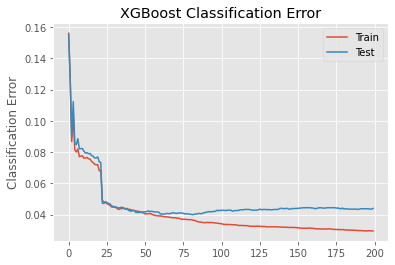

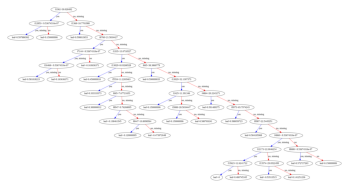

In [ ]:
#Applying TF-IDF to test set 

vect = TfidfVectorizer(norm=None,stop_words='english')
tokenize_test_xgb(vect, X_train, y_train, X_test, y_test)

In [ ]:
#hyperparameter tuning

def tokenize_test_xgbx(vect, X_train, y_train, X_test, y_test):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_val_dtm = vect.transform(X_val)

    print(X_train_dtm.shape)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use XGBClassifier
    xgb = xg.sklearn.XGBClassifier( n_estimators=300,
                                    nthread=-1,
                                    objective='binary:logistic')
    
    parameters = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}

    grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
    )

    grid_search.fit(X_train_dtm,y_train)
    print(grid_search.best_estimator_)


In [ ]:
#hyperparam test
#CountVec
vect = CountVectorizer()
tokenize_test_xgbx(vect, X_train, y_train, X_val, y_val)


(17843, 16789)
Features:  16789
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
XGBClassifier(colsample_bytree=0.5, learning_rate=0.3, max_depth=12, nthread=-1)


In [ ]:
from gensim.models import FastText

In [ ]:
#fasttext
vect = FastText()
tokenize_test_xgb(vect, X_train, y_train, X_test, y_test)


AttributeError: ignored